<a href="https://colab.research.google.com/github/Sabeerahamedsk/Python/blob/main/Netflix_Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import copy
from wordcloud import WordCloud

In [13]:
# loading the dataset
df = pd.read_csv('netflix.csv')

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [16]:
df.shape

(8807, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [22]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

These are total features of our dataset. It is seen that show_id column has all unique values, Title column has all unique values i.e. total 8807 which equates with total rows in the dataset.

Total 8807 movies/TV shows data is provided in the dataset.

In [24]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


from matplotlib import pyplot as plt
_df_2['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

Only single column having numerical values. It gives idea of release year of the content ranges between what timeframe. Rest all the columns are having categorical data.

In [25]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Data Cleaning
Overall null values in each column of the dataset

In [26]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

3 missing values are found in duration column , and it is also found that by mistake those data got entered in rating column

In [27]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [28]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [34]:
df.duplicated().value_counts()

False    8807
Name: count, dtype: int64

There are no duplicate entries in the dataset

In [47]:
#1. Find the counts of each categorical variable both using graphical and nongraphical analysis

# Assuming df is your DataFrame containing categorical variables
# You can replace df with your actual DataFrame name

# A. Count of each categorical variable
categorical_counts = df['type'].value_counts()

# Display counts
print("Non-graphical analysis:")
print(categorical_counts)

Non-graphical analysis:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


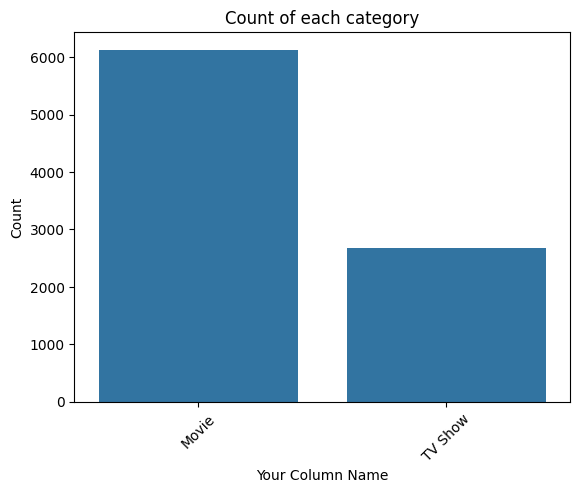

In [49]:
# B. Count plot for each categorical variable
sns.countplot(data=df, x='type')
plt.title('Count of each category')
plt.xlabel('Your Column Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [35]:
# checking the unique values for columns
for i in ['type','release_year','rating','duration']:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in type column are :-
['Movie' 'TV Show']
----------------------------------------------------------------------
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
----------------------------------------------------------------------
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
----------------------------------------------------------------------
Unique Values in duration column are :-
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 m

In [36]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
    print('Value count in',i,'column are :-')
    print(df[i].value_counts())
    print('-'*70)

Value count in type column are :-
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in release_year column are :-
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64
----------------------------------------------------------------------
Value count in rating column are :-
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64
----------------------------------------------------------------------
Value count in duration column are :-
duration
1 Season     1793
2 Seasons     425
3 Seasons    

In [38]:
df['rating'].replace({'74 min':np.nan ,'84 min' : np.nan, '66 min' : np.nan},inplace = True)

There is presense of 3 unusual values in rating column. We will replace them by NaN

In [39]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [40]:
# percentage of nullity
for i in df.columns:
    null_rate = df[i].isnull().sum()/df.shape[0] * 100
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.08%
duration's null rate : 0.03%


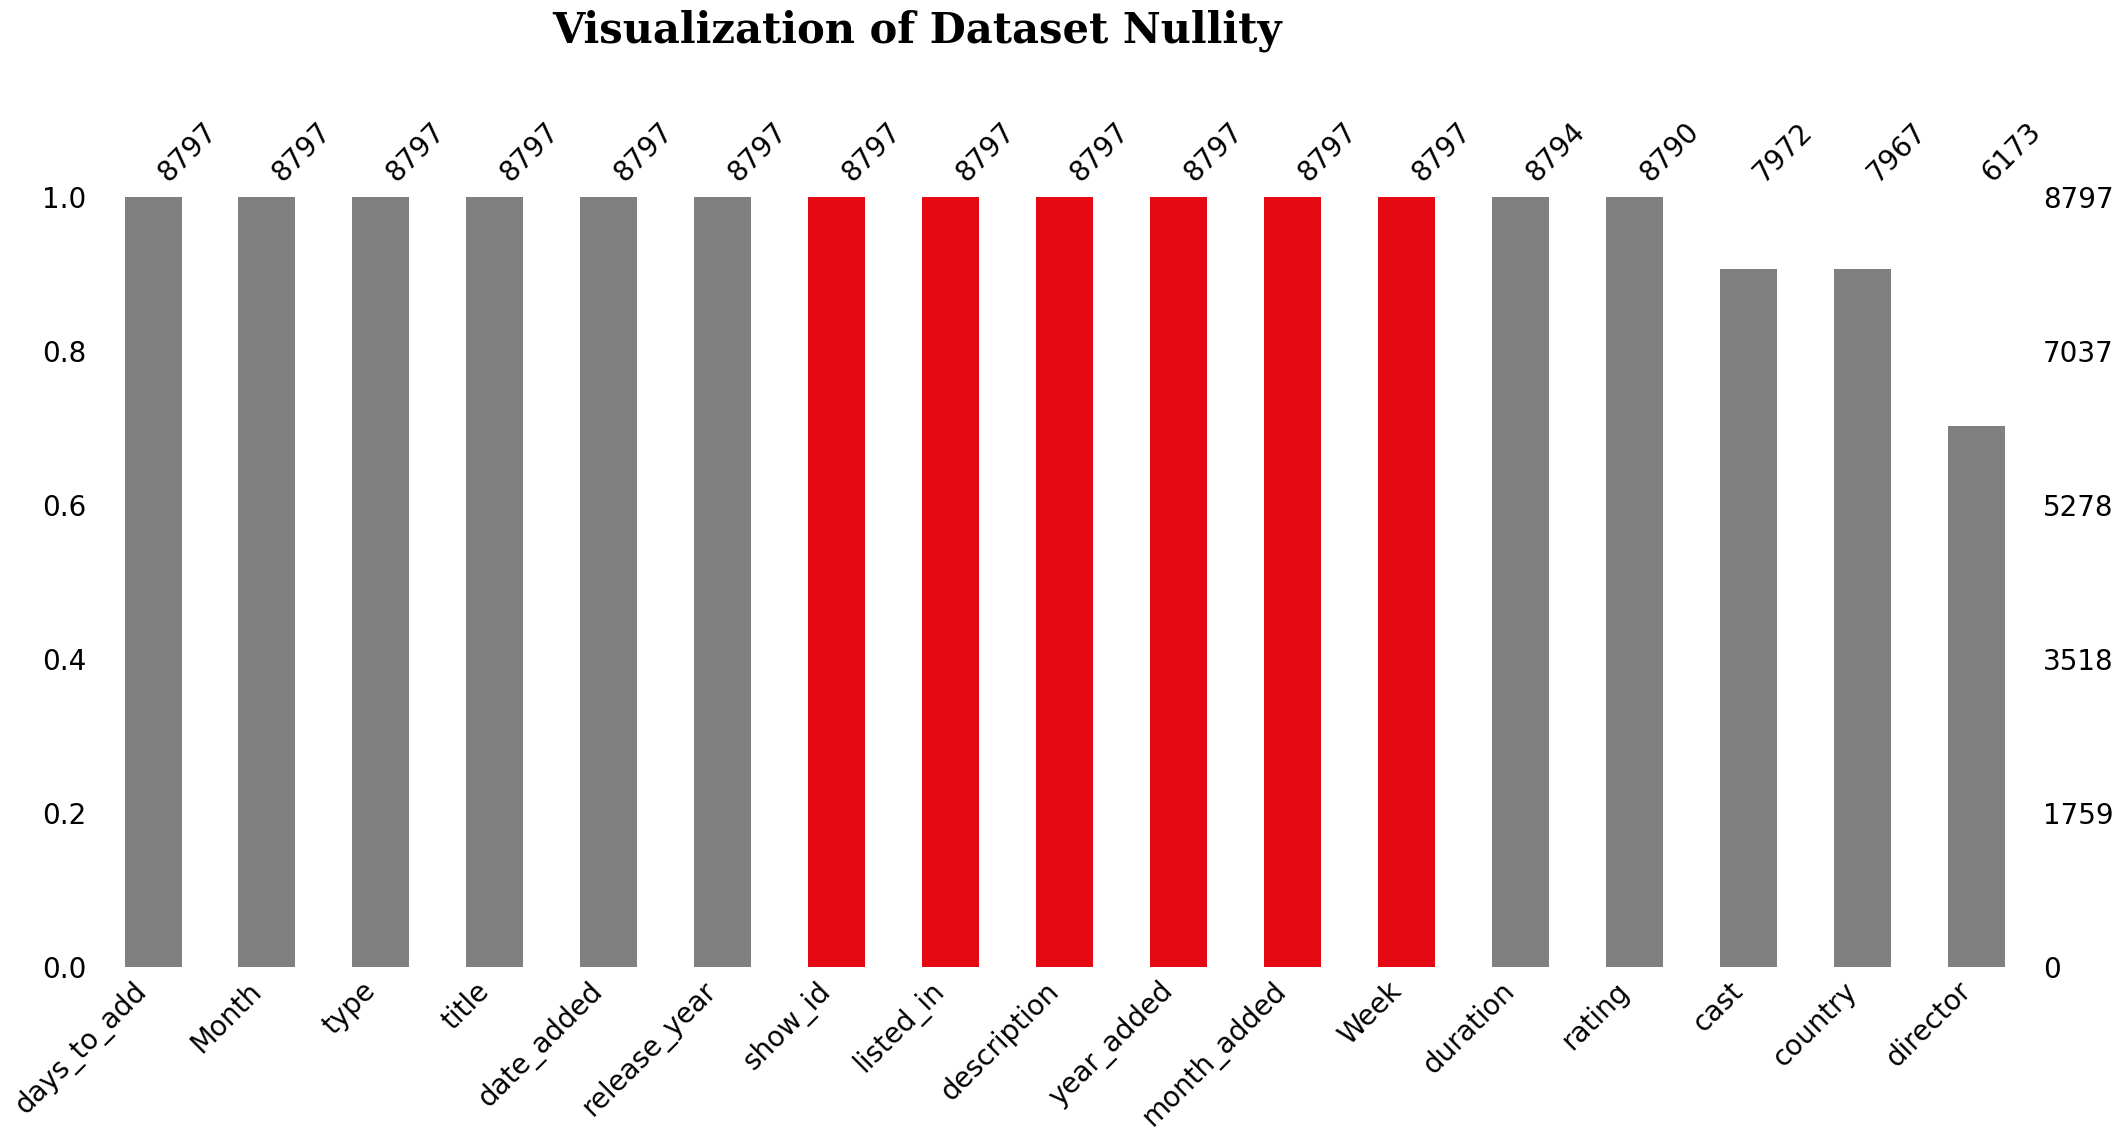

In [85]:
# missing value visualisation
color = ['grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914','#E50914','#E50914']
ax = msno.bar(df,sort = 'descending',color = color,fontsize = 20)
ax.text(3.5,1.2,'Visualization of Dataset Nullity',{'font':'serif', 'color':'black','weight':'bold','size':30})
plt.show()

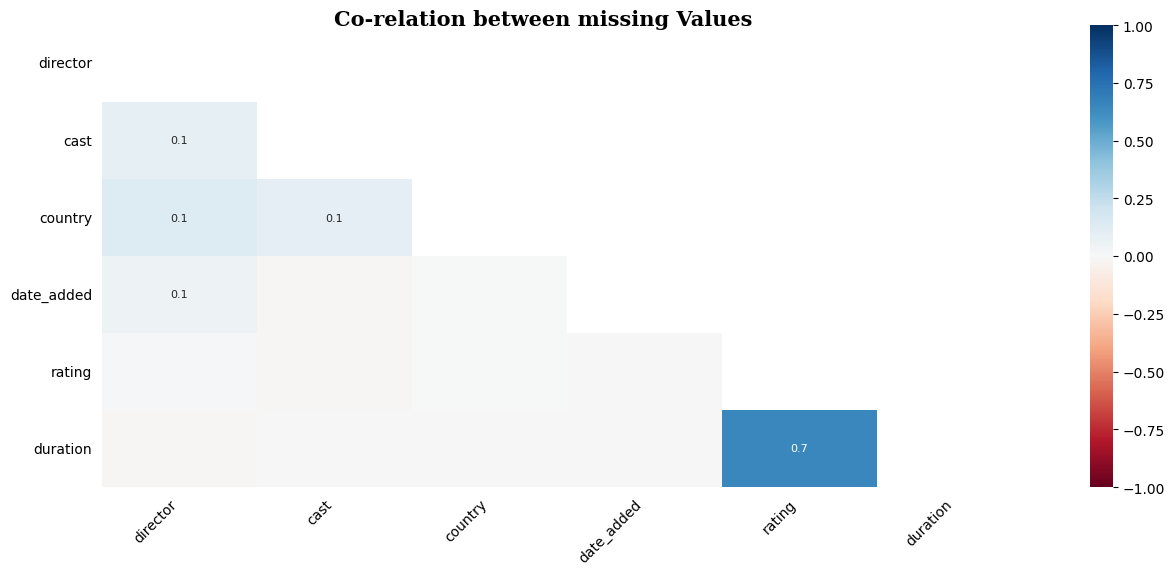

In [42]:
# Correlation between missing Values
ax = msno.heatmap(df,figsize = (15,6),fontsize = 10)
ax.text(1.5,0,'Co-relation between missing Values',{'font':'serif', 'color':'black','weight':'bold','size':15})
plt.show()

From our above analysis, there are total of 6 columns containing missing values. Director's column has the most missing values followed by cast and country column. Date added, ratings and duration have significantly less missing values (<1%)

The heatmap illustrates the correlation of missing data between each pair of columns. Apart from strong correlation between rating and duration column, The fact that all other values are close to 0 indicates that there is no dependence between the occurrence of missing values in two variables

In [52]:
#2. Comparison of tv shows vs. movies

# a.Find the number of movies produced in each country and pick the top 10 countries.
# Hint : We want you to apply group by each country and find the count of unique titles of movies
# Assuming df is your DataFrame containing movie data with columns 'Country' and 'Title'
# Replace df with your actual DataFrame name and adjust column names if needed

# Group by country and count unique titles
country_movie_counts = df.groupby('country')['title'].nunique()

# Sort the counts in descending order and select the top 10
top_10_countries = country_movie_counts.sort_values(ascending=False).head(10)

print("Top 10 countries by number of movies produced:")
print(top_10_countries)


Top 10 countries by number of movies produced:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: title, dtype: int64


# b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.
# Hint : We want you to apply group by each country and find the count of unique titles of Tv-shows

In [53]:
# Assuming df is your DataFrame containing TV show data with columns 'Country' and 'Title'
# Replace df with your actual DataFrame name and adjust column names if needed

# Filter the DataFrame to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Group by country and count unique titles of TV shows
country_tv_show_counts = tv_shows_df.groupby('country')['title'].nunique()

# Sort the counts in descending order and select the top 10
top_10_countries_tv_shows = country_tv_show_counts.sort_values(ascending=False).head(10)

print("Top 10 countries by number of TV shows produced:")
print(top_10_countries_tv_shows)


Top 10 countries by number of TV shows produced:
country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64


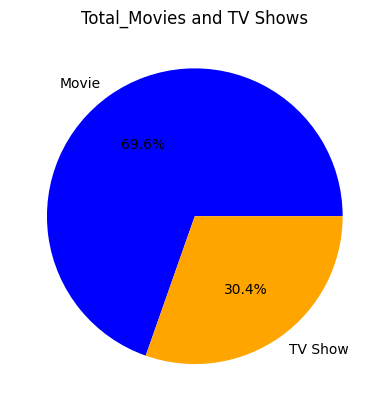

In [63]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

It is observed that , around 70% content is Movies and around 30% content is TV shows.

What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each week and count
the total number of movies/ tv shows.

In [54]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [55]:
movies  = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [56]:
movies.duration.value_counts()

duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [57]:
tv_shows.duration.value_counts()

duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64

Since movie and TV shows both have different format for duration, we can change duration for movies as minutes & TV shows as seasons

In [58]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')

In [59]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

In [60]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [61]:
tv_shows.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2676, dtype: float64

In [62]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

In [65]:
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)

dropped the null from date_added column

In [66]:
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

For 'date_added' column, all values confirm to date format, So we can convert its data type from object to datetime

In [71]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [72]:
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

We can add the new column 'year_added' by extracting the year from 'date_added' column

In [73]:
df['year_added'] = df['date_added'].dt.year

In [74]:
df['month_added'] = df['date_added'].dt.month

In [75]:
df[['date_added' , 'year_added' , 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


In [76]:
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

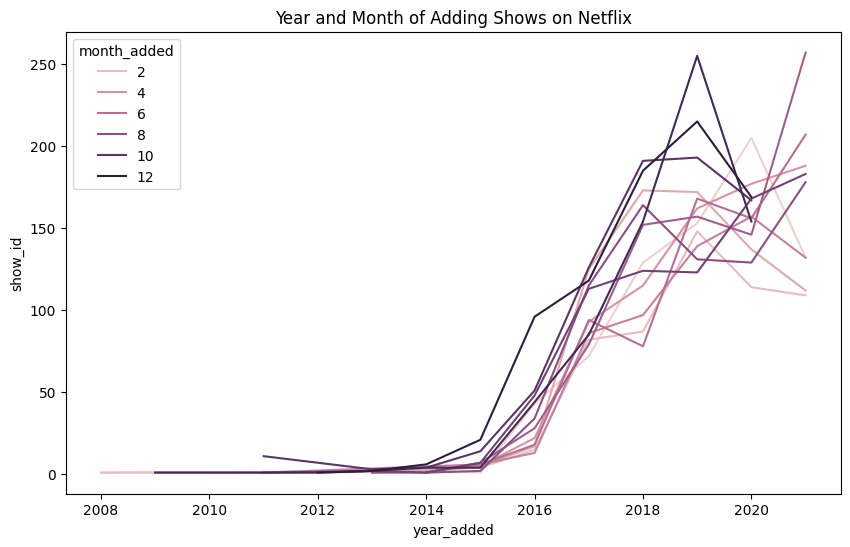

In [77]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

The number of shows getting added is increasing with each year until 2020.
Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

3. What is the best time to launch a TV show?

a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each week and count the total number of movies/ tv shows.

In [78]:
# Assuming df is your DataFrame containing TV show and movie data with a column 'date_added' and 'type'
# Replace df with your actual DataFrame name and adjust column names if needed

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the week number from the 'date_added' column
df['Week'] = df['date_added'].dt.isocalendar().week

# Filter the DataFrame for TV shows and movies separately
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Group by week and count the total number of TV shows and movies released in each week
tv_shows_by_week = tv_shows_df.groupby('Week').size()
movies_by_week = movies_df.groupby('Week').size()

# Find the best week for TV shows and movies separately
best_week_tv_shows = tv_shows_by_week.idxmax()
best_week_movies = movies_by_week.idxmax()

print("Best week to release TV shows:", best_week_tv_shows)
print("Best week to release movies:", best_week_movies)


Best week to release TV shows: 27
Best week to release movies: 1


Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each month and
count the total number of movies/ tv shows.

In [79]:
# Assuming df is your DataFrame containing TV show and movie data with a column 'date_added' and 'type'
# Replace df with your actual DataFrame name and adjust column names if needed

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the month from the 'date_added' column
df['Month'] = df['date_added'].dt.month

# Filter the DataFrame for TV shows and movies separately
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Group by month and count the total number of TV shows and movies released in each month
tv_shows_by_month = tv_shows_df.groupby('Month').size()
movies_by_month = movies_df.groupby('Month').size()

# Find the best month for TV shows and movies separately
best_month_tv_shows = tv_shows_by_month.idxmax()
best_month_movies = movies_by_month.idxmax()

print("Best month to release TV shows:", best_month_tv_shows)
print("Best month to release movies:", best_month_movies)


Best month to release TV shows: 12
Best month to release movies: 7


4. Analysis of actors/directors of different types of shows/movies.

a. Identify the top 10 directors who have appeared in most movies or TV shows.

Hint : We want you to group by each actor and find the count of unique titles of Tv-shows/movies

In [80]:
# Assuming df is your DataFrame containing movie and TV show data with columns 'director' and 'type'
# Replace df with your actual DataFrame name and adjust column names if needed

# Group the data by director and count the number of unique titles of movies or TV shows
director_counts = df.groupby('director')['title'].nunique()

# Sort the directors based on the count in descending order
top_10_directors = director_counts.sort_values(ascending=False).head(10)

print("Top 10 directors who have appeared in the most movies or TV shows:")
print(top_10_directors)

Top 10 directors who have appeared in the most movies or TV shows:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: title, dtype: int64


b. Identify the top 10 directors who have appeared in most movies or TV shows.


Hint : We want you to group by each director and find the count of unique titles of Tv-shows/movies

In [81]:
# Assuming df is your DataFrame containing movie and TV show data with columns 'director' and 'type'
# Replace df with your actual DataFrame name and adjust column names if needed

# Group the data by director and count the number of unique titles of movies or TV shows
director_counts = df.groupby('director')['title'].nunique()

# Sort the directors based on the count in descending order and select the top 10 directors
top_10_directors = director_counts.nlargest(10)

print("Top 10 directors who have appeared in the most movies or TV shows:")
print(top_10_directors)


Top 10 directors who have appeared in the most movies or TV shows:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: title, dtype: int64


5. Which genre movies are more popular or produced more

Hint : We want you to apply the word cloud on the genre columns to know which kind of genre is produced

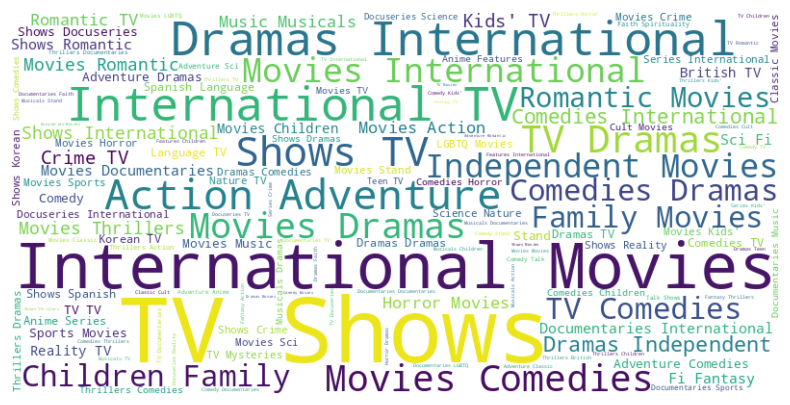

In [83]:
# Assuming df is your DataFrame containing movie data with a column 'genre'
# Replace df with your actual DataFrame name and adjust column names if needed

# Concatenate all genres into a single string
genres_text = ' '.join(df['listed_in'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

Hint : We want you to get the difference between the columns having date added information and release year information and get the mode of difference. This will give an insight into what will be the better time to add in Netflix

In [84]:
# Assuming df is your DataFrame containing movie data with columns 'release_year' and 'date_added'
# Replace df with your actual DataFrame name and adjust column names if needed

# Convert 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Calculate the difference in days between 'date_added' and 'release_year'
df['days_to_add'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days

# Find the mode of the difference
mode_days_to_add = df['days_to_add'].mode()[0]

print("After how many days the movie will be added to Netflix after its release (mode):", mode_days_to_add, "days")


After how many days the movie will be added to Netflix after its release (mode): 334 days
